In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cases_file = '../Resources/Covid cases by state.csv'
cases_df = pd.read_csv(cases_file, encoding="ISO-8859-1")
cases_df = cases_df.fillna(0)

revised_cases_df = cases_df[['state','date','total_population','new_cases','new_cases_7_day_rolling_avg']]
revised_cases_df = revised_cases_df.fillna(0)
revised_cases_df.head()

,state,date,total_population,new_cases,new_cases_7_day_rolling_avg
0,Alabama,1/22/2020,4887871.0,0.0,0.0
1,Alabama,1/23/2020,4887871.0,0.0,0.0
2,Alabama,1/24/2020,4887871.0,0.0,0.0
3,Alabama,1/25/2020,4887871.0,0.0,0.0
4,Alabama,1/26/2020,4887871.0,0.0,0.0


In [3]:
unemployment_file = '../Resources/Unemployment claims by state.csv'
unemployment_df = pd.read_csv(unemployment_file, encoding="ISO-8859-1")
unemployment_df = unemployment_df.fillna(0)

revised_unemployment_df = unemployment_df.rename(columns={'Filed week ended':'date', 'ï»¿State': 'state'})
revised_unemployment_df = revised_unemployment_df[['state', 'date', 'Initial Claims', 'Insured Unemployment Rate']]
revised_unemployment_df = revised_unemployment_df.fillna(0)
revised_unemployment_df.head()


,state,date,Initial Claims,Insured Unemployment Rate
0,Alabama,1/4/2020,"4,578",0.96
1,Alabama,1/11/2020,"3,629",1.10
2,Alabama,1/18/2020,"2,483",0.90
3,Alabama,1/25/2020,"2,129",0.96
4,Alabama,2/1/2020,"2,170",0.90


In [4]:
claims_with_cases_df = pd.merge(revised_cases_df, revised_unemployment_df, on=['date','state'], how='inner')
claims_with_cases_df = claims_with_cases_df.fillna(0)
claims_with_cases_df = claims_with_cases_df[['date','state','total_population','new_cases','new_cases_7_day_rolling_avg','Initial Claims','Insured Unemployment Rate']]
#sum_grouped_df.sort_values(by='date')
#grouped_df = combined_df.groupby([claims_with_cases_df['state'], claims_with_cases_df['date']])
#max_grouped_df = grouped_df[['total_population','new_cases','new_cases_7_day_rolling_avg','Initial Claims','Insured Unemployment Rate']].max()
#max_grouped_df.sort_values(by='date')
#max_grouped_df.head(60)
claims_with_cases_df


,date,state,total_population,new_cases,new_cases_7_day_rolling_avg,Initial Claims,Insured Unemployment Rate
0,1/25/2020,Alabama,4887871.0,0.0,0.00,"2,129",0.96
1,2/1/2020,Alabama,4887871.0,0.0,0.00,"2,170",0.90
2,2/8/2020,Alabama,4887871.0,0.0,0.00,"2,176",0.87
3,2/15/2020,Alabama,4887871.0,0.0,0.00,"1,981",0.86
4,2/22/2020,Alabama,4887871.0,0.0,0.00,"1,735",0.83
...,...,...,...,...,...,...,...
2115,9/26/2020,Wyoming,577737.0,45.0,97.71,801,2.72
2116,10/3/2020,Wyoming,577737.0,151.0,128.57,759,2.53
2117,10/10/2020,Wyoming,577737.0,120.0,155.71,944,2.47
2118,10/17/2020,Wyoming,577737.0,151.0,194.43,"1,375",2.29


In [5]:
# Path of csv file, originally converted using tabula
state_political_control_path = "../Resources/Legislative Partison Composition by State 2020-04-01 - Processed.csv"

# Read the csv file
state_political_control_df = pd.read_csv(state_political_control_path, encoding="ISO-8859-1")

In [6]:
# Display the data table for preview
# Replace all NaN values with 0 
state_political_control_df = state_political_control_df.fillna(0)

state_political_control_df = state_political_control_df.rename(columns={'ï»¿STATE': 'state'})

state_political_control_df = state_political_control_df[['state', 'State Control']]
state_political_control_df

,state,State Control
0,Alabama,Rep
1,Alaska,Rep
2,Arizona,Rep
3,Arkansas,Rep
4,California,Dem
5,Colorado,Dem
6,Connecticut,Dem
7,Delaware,Dem
8,Florida,Rep
9,Georgia,Rep


In [7]:
combined_df = pd.merge(claims_with_cases_df, state_political_control_df, on=['state'], how='inner')
combined_df['Initial Claims']  = pd.to_numeric(combined_df['Initial Claims'] ,errors='coerce')
combined_df['date'] = combined_df['date'].astype('datetime64[ns]')
combined_df.loc[combined_df['State Control'] == 0, 'State Control'] = 'Non_Partison'
combined_df = combined_df.fillna(0)
combined_df

#print(combined_df.dtypes)

,date,state,total_population,new_cases,new_cases_7_day_rolling_avg,Initial Claims,Insured Unemployment Rate,State Control
0,2020-01-25,Alabama,4887871.0,0.0,0.00,0.0,0.96,Rep
1,2020-02-01,Alabama,4887871.0,0.0,0.00,0.0,0.90,Rep
2,2020-02-08,Alabama,4887871.0,0.0,0.00,0.0,0.87,Rep
3,2020-02-15,Alabama,4887871.0,0.0,0.00,0.0,0.86,Rep
4,2020-02-22,Alabama,4887871.0,0.0,0.00,0.0,0.83,Rep
...,...,...,...,...,...,...,...,...
1995,2020-09-26,Wyoming,577737.0,45.0,97.71,801.0,2.72,Rep
1996,2020-10-03,Wyoming,577737.0,151.0,128.57,759.0,2.53,Rep
1997,2020-10-10,Wyoming,577737.0,120.0,155.71,944.0,2.47,Rep
1998,2020-10-17,Wyoming,577737.0,151.0,194.43,0.0,2.29,Rep


In [8]:
grouped_df = combined_df.groupby([combined_df['State Control'], combined_df['date']]).sum()
grouped_df = grouped_df[['new_cases','Initial Claims']]
grouped_df

new_cases  Initial Claims
State Control date                                 
Dem           2020-01-25        0.0          2382.0
              2020-02-01        0.0          3258.0
              2020-02-08        0.0          3142.0
              2020-02-15        0.0          3121.0
              2020-02-22        0.0          2106.0
...                             ...             ...
Rep           2020-09-26    22224.0          1924.0
              2020-10-03    25147.0          2044.0
              2020-10-10    25879.0          1387.0
              2020-10-17    31396.0           485.0
              2020-10-24    42090.0           482.0

[160 rows x 2 columns]

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730.]),
 <a list of 10 Text major ticklabel objects>)

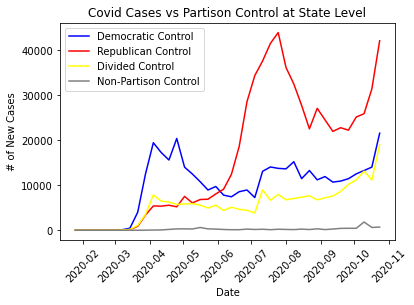

In [9]:
unstacked_df = grouped_df.unstack(level=0)

dates = unstacked_df.index.values

new_cases_dem = unstacked_df['new_cases']['Dem']
new_cases_rep = unstacked_df['new_cases']['Rep']
new_cases_div = unstacked_df['new_cases']['Divided']
new_cases_nonp = unstacked_df['new_cases']['Non_Partison']

dem_cases, = plt.plot(dates, new_cases_dem, color="blue", label="Democratic Control",)
rep_cases, = plt.plot(dates, new_cases_rep, color="red", label="Republican Control")
div_cases, = plt.plot(dates, new_cases_div, color="yellow", label="Divided Control")
nonp_cases, = plt.plot(dates, new_cases_nonp, color="gray", label="Non-Partison Control")
plt.legend()
plt.title('Covid Cases vs Partison Control at State Level')
plt.xlabel('Date')
plt.ylabel('# of New Cases')
plt.xticks(rotation=45)

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730.]),
 <a list of 10 Text major ticklabel objects>)

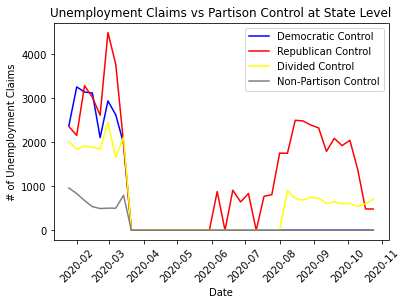

In [10]:
unemployment_dem = unstacked_df['Initial Claims']['Dem']
unemployment_rep = unstacked_df['Initial Claims']['Rep']
unemployment_div = unstacked_df['Initial Claims']['Divided']
unemployment_nonp = unstacked_df['Initial Claims']['Non_Partison']

dem_unemployment, = plt.plot(dates, unemployment_dem, color="blue", label="Democratic Control",)
rep_unemployment, = plt.plot(dates, unemployment_rep, color="red", label="Republican Control")
div_unemployment, = plt.plot(dates, unemployment_div, color="yellow", label="Divided Control")
nonp_unemployment, = plt.plot(dates, unemployment_nonp, color="gray", label="Non-Partison Control")
plt.legend()
plt.title('Unemployment Claims vs Partison Control at State Level')
plt.xlabel('Date')
plt.ylabel('# of Unemployment Claims')
plt.xticks(rotation=45)

In [11]:
state_grouped_df = combined_df.groupby([combined_df['state'], combined_df['date']]).sum()
state_grouped_df = state_grouped_df[['new_cases','Initial Claims']]
state_grouped_df

new_cases  Initial Claims
state   date                                 
Alabama 2020-01-25        0.0             0.0
        2020-02-01        0.0             0.0
        2020-02-08        0.0             0.0
        2020-02-15        0.0             0.0
        2020-02-22        0.0             0.0
...                       ...             ...
Wyoming 2020-09-26       45.0           801.0
        2020-10-03      151.0           759.0
        2020-10-10      120.0           944.0
        2020-10-17      151.0             0.0
        2020-10-24      260.0             0.0

[2000 rows x 2 columns]

Enter a state: Vermont


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730.]),
 <a list of 10 Text major ticklabel objects>)

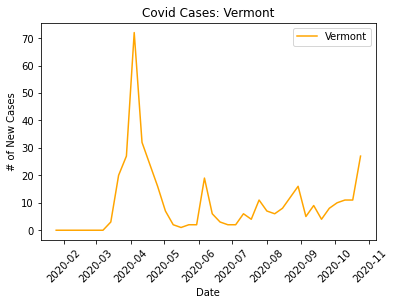

In [12]:
state_unstacked_df = state_grouped_df.unstack(level=0)

state = input('Enter a state: ')

new_cases_state = state_unstacked_df['new_cases'][state]

state_cases, = plt.plot(dates, new_cases_state, color="orange", label=state,)

plt.legend()
plt.title(f'Covid Cases: {state}')
plt.xlabel('Date')
plt.ylabel('# of New Cases')
plt.xticks(rotation=45)

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730.]),
 <a list of 10 Text major ticklabel objects>)

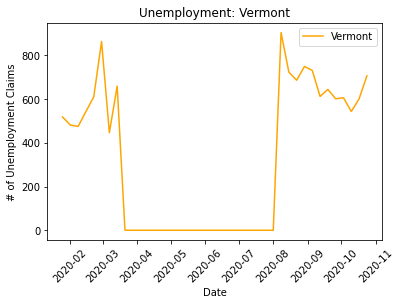

In [13]:
unemployment_state = state_unstacked_df['Initial Claims'][state]

state_unemployment, = plt.plot(dates, unemployment_state, color="orange", label=state,)

plt.legend()
plt.title(f'Unemployment: {state}')
plt.xlabel('Date')
plt.ylabel('# of Unemployment Claims')
plt.xticks(rotation=45)